In [43]:
import pandas as pd
import numpy as np
import datetime
import sklearn 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
  
    if (a_set & b_set): 
        return a_set & b_set 
    else: 
        print("No common elements")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train = train.dropna(axis=0)
test = test.dropna(axis=0)

train[["day"]] = pd.to_datetime(train['runDate']).dt.dayofweek
train[["runday", "runmonth", "runyear"]] = train['runDate'].str.split("-", expand = True)
train[["Adate", "Atime"]] = train['scheduledArrival'].str.split(" ", expand = True)
train[["Aday", "Amonth", "Ayear"]] = train['Adate'].str.split("-", expand = True)
train[["Ahour", "Aminute", "Asecond"]] = train['Atime'].str.split(":", expand = True)

train[["Ddate", "Dtime"]] =train['scheduledDeparture'].str.split(" ", expand = True)
train[["Dday", "Dmonth", "Dyear"]] = train['Ddate'].str.split("-", expand = True)
train[["Dhour", "Dminute", "Dsecond"]] = train['Dtime'].str.split(":", expand = True)
train = train.drop(['scheduledArrival','scheduledDeparture','Adate','Atime','Ddate','Dtime','runDate'], axis = 1)

test[["day"]] = pd.to_datetime(test['runDate']).dt.dayofweek
test[["runday", "runmonth", "runyear"]] = test['runDate'].str.split("-", expand = True)
test[["Adate", "Atime"]] = test['scheduledArrival'].str.split(" ", expand = True)
test[["Aday", "Amonth", "Ayear"]] = test['Adate'].str.split("-", expand = True)
test[["Ahour", "Aminute", "Asecond"]] = test['Atime'].str.split(":", expand = True)

test[["Ddate", "Dtime"]] = test['scheduledDeparture'].str.split(" ", expand = True)
test[["Dday", "Dmonth", "Dyear"]] = test['Ddate'].str.split("-", expand = True)
test[["Dhour", "Dminute", "Dsecond"]] = test['Dtime'].str.split(":", expand = True)
test = test.drop(['scheduledArrival','scheduledDeparture','Adate','Atime','Ddate','Dtime','runDate'], axis = 1)

train_cols = train.columns
test_cols = test.columns

cols = list(common_member(train_cols, test_cols))
cols.sort()
test = test[cols]
y = train['ArrivalDelay']
train = train[cols]
print('Train: ',train.columns,'\n Test : ', test.columns)
train = np.array(pd.concat([train,y],axis=1))
X_train = train[:,:(len(train[0])-1)]
y_train = np.array(train)[:,len(train[0])-1]
X_test = np.array(test)

Train:  Index(['Aday', 'Ahour', 'Aminute', 'Amonth', 'Asecond', 'Ayear', 'Dday',
       'Dhour', 'Dminute', 'Dmonth', 'Dsecond', 'Dyear', 'day', 'dayCount',
       'distance', 'runday', 'runmonth', 'runyear', 'stations', 'trainCode',
       'trainStationId'],
      dtype='object') 
 Test :  Index(['Aday', 'Ahour', 'Aminute', 'Amonth', 'Asecond', 'Ayear', 'Dday',
       'Dhour', 'Dminute', 'Dmonth', 'Dsecond', 'Dyear', 'day', 'dayCount',
       'distance', 'runday', 'runmonth', 'runyear', 'stations', 'trainCode',
       'trainStationId'],
      dtype='object')


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
station_id = X_train[:,18] 
le.fit(station_id)
X_train[:,18] = le.transform(station_id)
X_test[:,18] = le.transform(X_test[:,18])
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [45]:
train_data, test_data, y_t, y_test = train_test_split(X_train, y_train, test_size=0.2
                                                      , random_state=42)

Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(train_data, y_t)
lr.score(test_data,y_test)

0.09501387559628782

Polynomial Regression

In [47]:
poly = PolynomialFeatures(1)
t_data = poly.fit_transform(train_data,y_t)
print(len(t_data[0]))
ts_data = poly.fit_transform(test_data)

lr = LinearRegression()
lr.fit(t_data, y_t)
pred_test_lr = lr.predict(ts_data)

print(np.sqrt(mean_squared_error(y_test,pred_test_lr)), end = '\t') 
print(r2_score(y_test, pred_test_lr))

22
61.62016955417944	0.09501387559609509


Regression Trees

In [48]:
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

dtree = DecisionTreeRegressor(max_depth=26, min_samples_leaf=2, random_state=42)
dtree.fit(train_data, y_t)

pred_train_tree= dtree.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_tree)), end ='\t')
print(r2_score(y_t, pred_train_tree), end = '\t')

pred_test_tree= dtree.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree)), end = '\t') 
print(r2_score(y_test, pred_test_tree))

10.721034462610099	0.9706632114964583	26.76738219461166	0.8292314296899465


K-Nearest Neighours


In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=30, algorithm= 'ball_tree', p=2)
model_knn.fit(train_data,y_t)

print(np.sqrt(mean_squared_error(y_t,pred_train_nn)), end ='\t')
print(r2_score(y_t, pred_train_nn), end = '\t')

pred_test_nn= model_knn.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_nn)), end = '\t') 
print(r2_score(y_test, pred_test_nn))

53.31826784343899	0.2744100649542204	57.18634078390817	0.22056346574394414


Support Vector Regressor

In [ ]:
model_svm = SVR(degree = 10)
model_svm.fit(train_data, y_t)
pred_train_s= model_svm.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_s)), end = '\t')
print(r2_score(y_t, pred_train_s), end = '\t')

pred_test_s = model_svm.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_s)), end = '\t')
print(r2_score(y_test, pred_test_s))

66.05077732853944	-0.11351238521405604	68.28061623059187	-0.11119686233073844


Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
model_mlp = MLPRegressor(hidden_layer_sizes=(1,300), activation='tanh', alpha=0.0001, batch_size=1000, max_iter=500, shuffle=True)
model_mlp.fit(train_data, y_t)
pred_train_m= model_mlp.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_m)), end = '\t')
print(r2_score(y_t, pred_train_m), end = '\t')

pred_test_m = model_mlp.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_m)), end = '\t')
print(r2_score(y_test, pred_test_m))

62.59366959917338	-2.7812693259576804e-08	64.77635071548461	-6.700244677904088e-05


Ensmeble Learning Methods

Bagging

In [ ]:
import warnings
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor(RandomForestRegressor(n_estimators=100), max_samples=0.8, max_features=0.8)

model_bag.fit(train_data, y_t)
pred_train_bag= model_bag.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_bag)), end = '\t')
print(r2_score(y_t, pred_train_bag), end = '\t')

pred_test_bag = model_bag.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_bag)), end = '\t')
print(r2_score(y_test, pred_test_bag))

24.51836369306092	0.8465658076768361	39.6089569599036	0.6260763325096805


Random Forest

In [ ]:
model_rf = RandomForestRegressor(n_estimators=130, oob_score=True, random_state=100)
model_rf.fit(train_data, y_t) 
pred_train_rf= model_rf.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_rf)), end = '\t')
print(r2_score(y_t, pred_train_rf), end = '\t')

pred_test_rf = model_rf.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)), end = '\t')
print(r2_score(y_test, pred_test_rf))

Extra Trees Classfiier


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
clf = ExtraTreesRegressor(n_estimators=100, max_depth=25, min_samples_split=2, random_state=0)
clf.fit(train_data, y_t)

pred_train= clf.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train)), end = '\t')
print(r2_score(y_t, pred_train), end = '\t')

pred_test = clf.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test)), end = '\t')
print(r2_score(y_test, pred_test))

0.1175184607287694	0.9999964750628768	26.05488469300574	0.8382015139690397


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=30),
                              n_estimators=80)
model_ada.fit(train_data, y_t)

pred_train_ada= model_ada.predict(train_data)
print(np.sqrt(mean_squared_error(y_t,pred_train_ada)), end = '\t')
print(r2_score(y_t, pred_train_ada), end = '\t')

pred_test_ada = model_ada.predict(test_data)
print(np.sqrt(mean_squared_error(y_test,pred_test_ada)), end = '\t')
print(r2_score(y_test, pred_test_ada))

0.8266298377566749	0.999825594032562	21.86481289078632	0.8860569939342322


Principle Component Analysis -> Linear Models

1) Linear Regression

2) Ridge Regression

3) Lasso Tehcnique

4) ElasticNet Technique

In [ ]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pca = PCA(n_components=20)

# apply transform to dataset
train_data_chn = pca.fit_transform(train_data)
test_data_chn = pca.fit_transform(test_data)
# train_data_chn=train_data
# test_data_chn=test_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

model = LinearRegression(normalize=True, n_jobs=100)
model.fit(train_data_chn, y_t)

pred_train= model.predict(train_data_chn)
print('Linear:',np.sqrt(mean_squared_error(y_t,pred_train)), end = '\t')
print(r2_score(y_t, pred_train), end = '\t')

pred_test = model.predict(test_data_chn)
print(np.sqrt(mean_squared_error(y_test,pred_test)), end = '\t')
print(r2_score(y_test, pred_test))

model = Ridge(max_iter = 300)
model.fit(train_data_chn,y_t)

pred_train= model.predict(train_data_chn)
print('Ridge:',np.sqrt(mean_squared_error(y_t,pred_train)), end = '\t')
print(r2_score(y_t, pred_train), end = '\t')

pred_test = model.predict(test_data_chn)
print(np.sqrt(mean_squared_error(y_test,pred_test)), end = '\t')
print(r2_score(y_test, pred_test))

model = Lasso()
model.fit(train_data_chn,y_t)
pred_train= model.predict(train_data_chn)
print('Lasso:',np.sqrt(mean_squared_error(y_t,pred_train)), end = '\t')
print(r2_score(y_t, pred_train), end = '\t')

pred_test = model.predict(test_data_chn)
print(np.sqrt(mean_squared_error(y_test,pred_test)), end = '\t')
print(r2_score(y_test, pred_test))

model = ElasticNet()
model.fit(train_data_chn,y_t)
pred_train= model.predict(train_data_chn)
print('ElastcNet:',np.sqrt(mean_squared_error(y_t,pred_train)), end = '\t')
print(r2_score(y_t, pred_train), end = '\t')

pred_test = model.predict(test_data_chn)
print(np.sqrt(mean_squared_error(y_test,pred_test)), end = '\t')
print(r2_score(y_test, pred_test))


Linear: 59.39354173445062	0.09963701297118277	63.51201873436555	0.038591457714988064
Ridge: 59.39549198652038	0.09957788318849159	63.498019264369155	0.0390152429120153
Lasso: 59.53150852642259	0.09544920175649496	63.32927960158458	0.04411589923778225
ElastcNet: 60.02392139126679	0.08042339212864169	63.202532038306394	0.04793829356127721


PLOTS


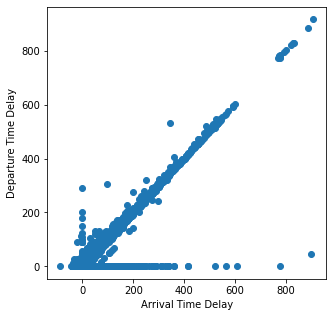

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y = np.array(train['DepartureDelay'])
x = np.array(train['ArrivalDelay'])
plt.figure(figsize=(5, 5))
plt.plot(x,y,'o')
# plt.title('Arrival Time Delay')
plt.xlabel('Arrival Time Delay')
plt.ylabel('Departure Time Delay')
plt.show()